# TSNE on creditcard dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [32]:
data = pd.read_csv("../data/creditcard.csv")

In [106]:
data.shape

(284807, 31)

In [120]:
data[data["Class"]==1].shape
data[data["Class"]==0].shape

(492, 31)

We have 492 fraud transaction and 284k legitimate transaction.<br/>
It is a highly balanced dataset. <br/>
Since it is not possible on my system to run TSNE on the whole dataset, I will sample out 10000 transaction.<br/>
For better visualization of TSNE , I will be retaining all the fraud transaction and the rest will be legitimate
transaction.<br/>

In [33]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
label = data["Class"]

In [35]:
fraud = data[data["Class"]==1]

Storing all the 492 fraud transaction.

In [37]:
fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [36]:
legitimate = data[data["Class"]==0]

Storing all the legtimate trasaction.

In [39]:
legitimate.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [62]:
fraud_legitimate = pd.concat([fraud,legitimate])

Merging the fraud and legitimate transaction , where the top 492 rows are fraud transaction.

In [63]:
label = fraud_legitimate["Class"]

In [64]:
label_removed_data = fraud_legitimate.drop("Class",axis="columns")

Storing the label in different column and dropping it from the original dataset.

In [65]:
label_removed_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


### Standardazing the 10k sample

In [66]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(label_removed_data)
print (standardized_data.shape)

(284807, 30)


In [123]:
type(label_removed_data)

pandas.core.frame.DataFrame

In [67]:
print (standardized_data[0:5])

[[ -1.98803351e+00  -1.18049500e+00   1.18209005e+00  -1.06173009e+00
    2.82364668e+00  -3.78330025e-01  -1.07076393e+00  -2.05109117e+00
    1.16519974e+00  -2.52140290e+00  -2.54606016e+00   3.13706080e+00
   -2.90223023e+00  -5.98049169e-01  -4.47452634e+00   4.25781697e-01
   -1.30184927e+00  -3.33208188e+00  -2.00703593e-02   5.12206010e-01
    1.64621432e-01   7.04174770e-01  -4.82973057e-02  -7.44982341e-01
    5.28688700e-01   8.54040255e-02   3.68789192e-01   6.46988199e-01
   -4.34060559e-01  -3.53229393e-01]
 [ -1.98664368e+00  -1.55386353e+00  -1.91200646e+00   7.17863873e-01
    1.61642661e+00   9.85191621e-01  -7.99255047e-01   2.63177207e-01
   -5.67619269e-02  -2.46627888e-01  -7.70159542e-01  -4.06163304e-01
   -5.03543878e-01   6.79714909e-01  -1.76511543e+00   2.18573512e+00
    7.60945700e-01   7.06101844e-01   2.05842640e+00   3.48072765e-01
    2.72703884e+00   9.00851536e-01   6.00078596e-01   2.20345179e+00
   -4.85107060e-01   5.36754832e-01  -3.01438878e-01 

In [68]:
from sklearn.manifold import TSNE

In [69]:
model = TSNE(n_components=2,random_state=2)

In [70]:
top_10000 = standardized_data[0:1000]

Taking only the top 10000 datapoints as sample.(492 fraud + 9508 legitimate

In [71]:
label_10000 = label[0:1000]

In [72]:
tsne_data =model.fit_transform(top_10000)

In [73]:
tsne_data = np.vstack((tsne_data.T,label_10000)).T

In [74]:
import seaborn as sn

In [95]:
neighbourhood = [30,35,40,45,50,100]
iteration = [500,1000,3000,5000]

In [92]:
def plot_tsne(it,per):
    model = TSNE(n_components=2, random_state=0, perplexity=per,  n_iter=it)
    tsne_data = model.fit_transform(top_10000) 

# creating a new data fram which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, label_10000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="label", size=6).map(plot.scatter, 'Dim_1', 'Dim_2').add_legend()
    plot.title("With perplexity ="+str(per)+", n_iter="+str(it))
    plot.show()
    

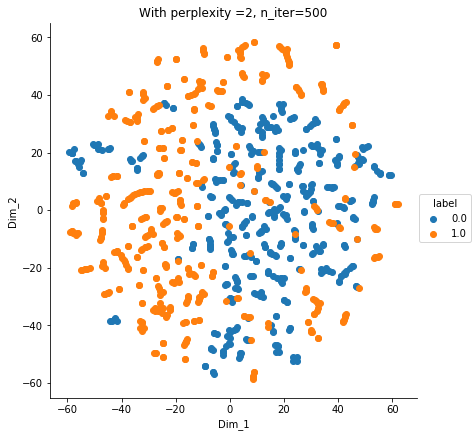

In [122]:
plot_tsne(500,2)

With perplexity = 2 and n_iter = 500 , we can see that all the datapoints are overlapping.

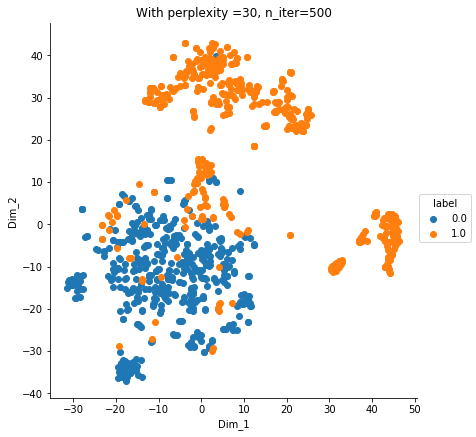

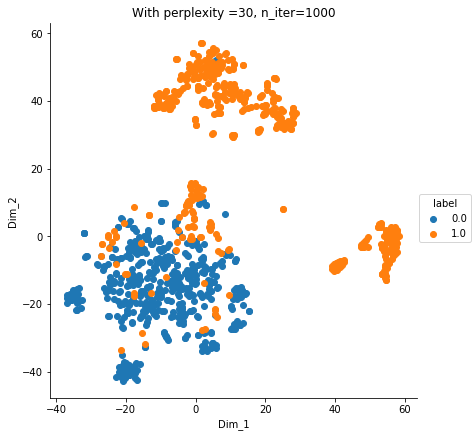

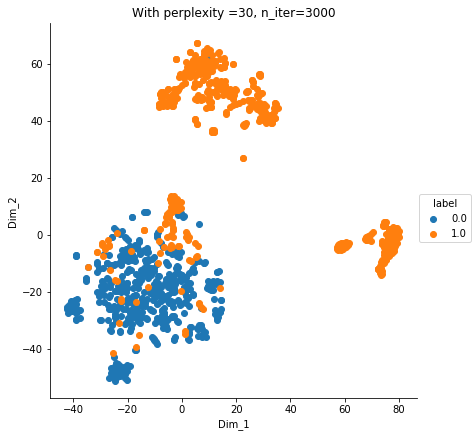

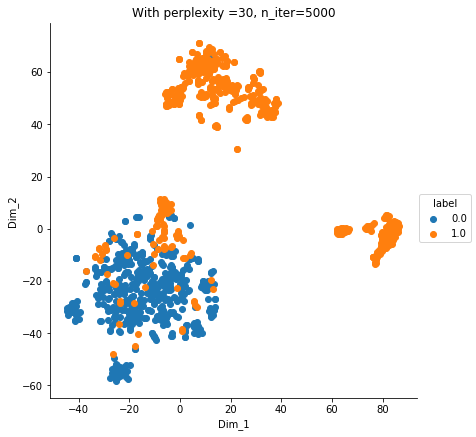

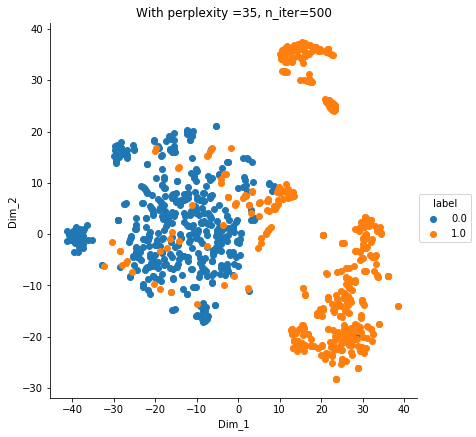

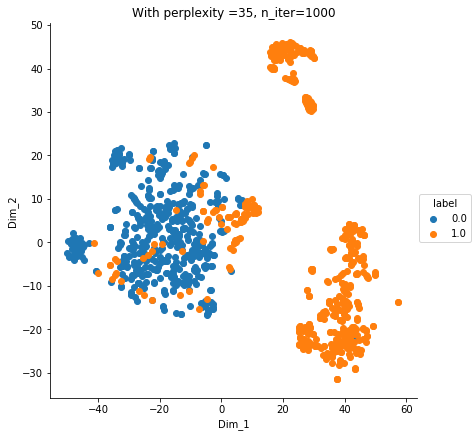

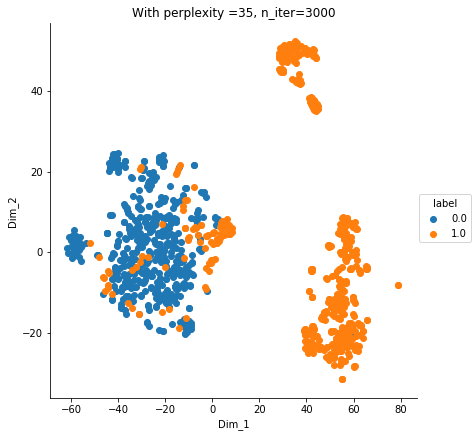

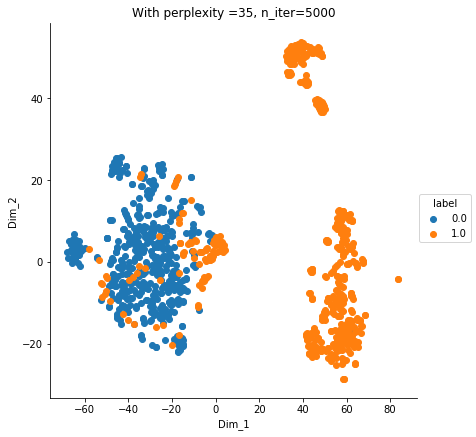

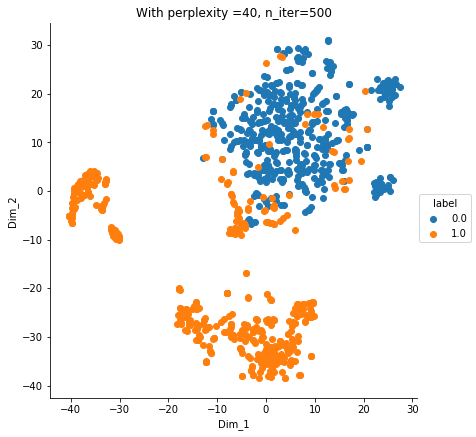

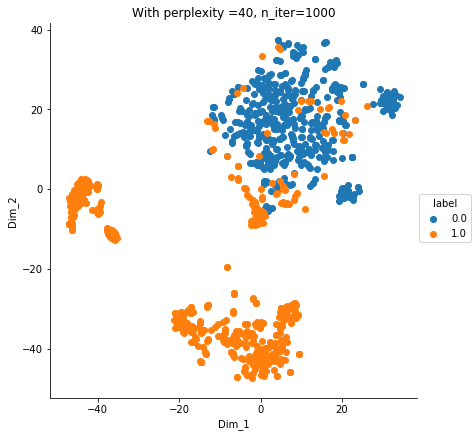

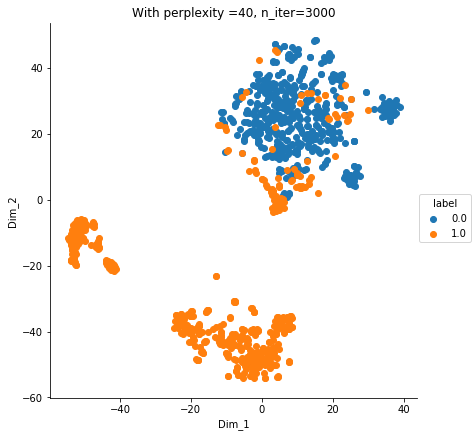

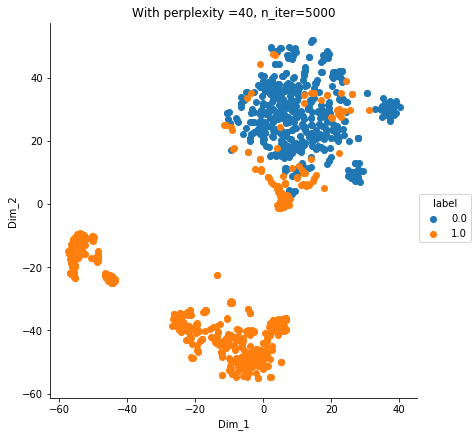

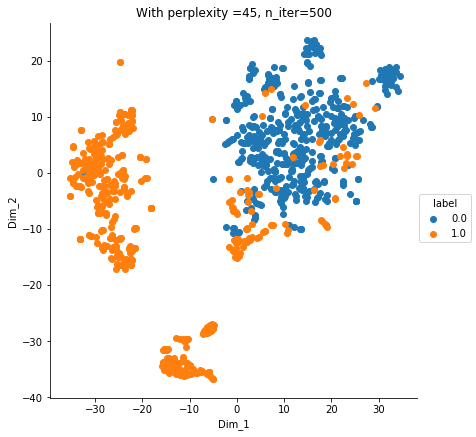

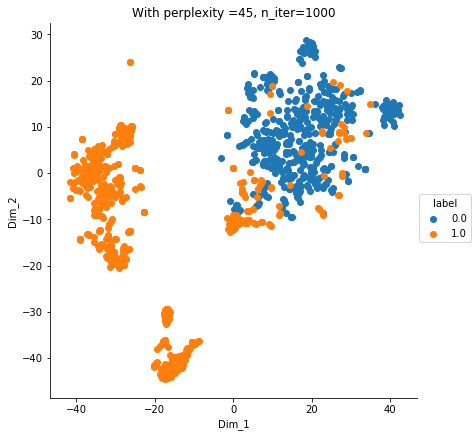

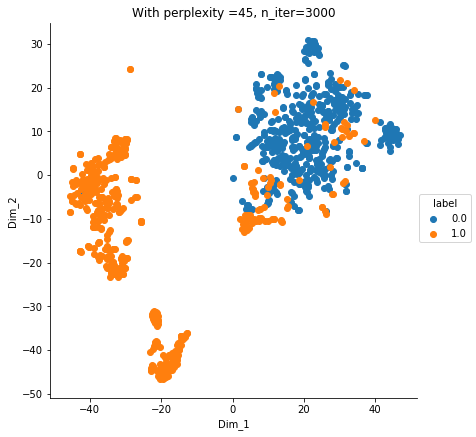

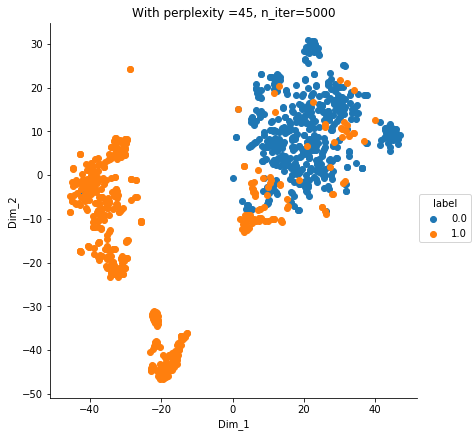

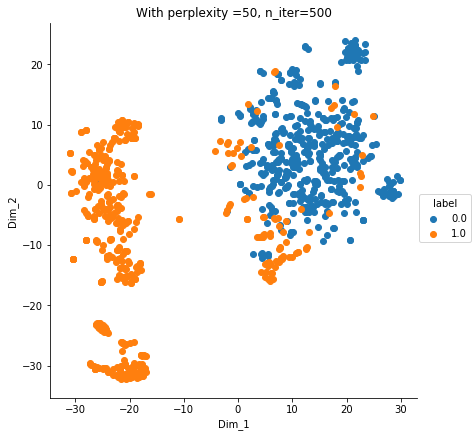

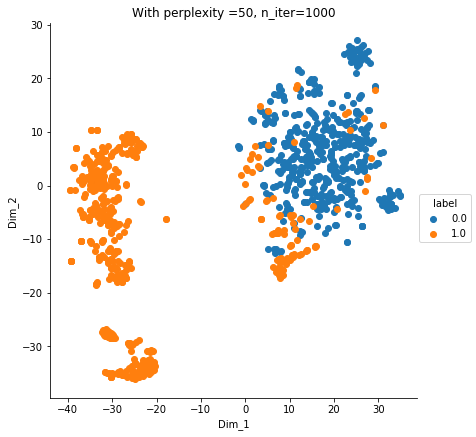

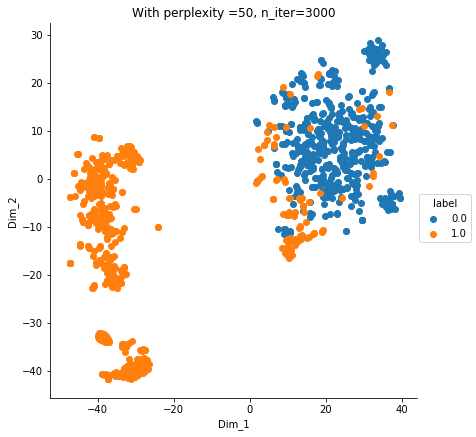

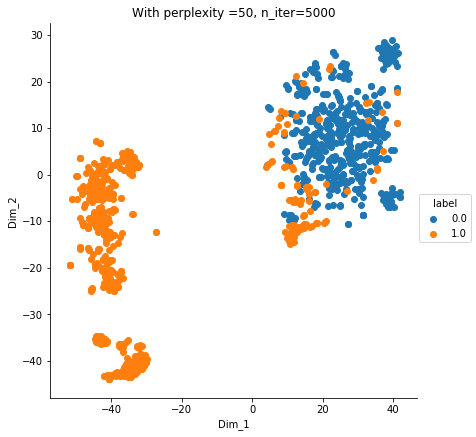

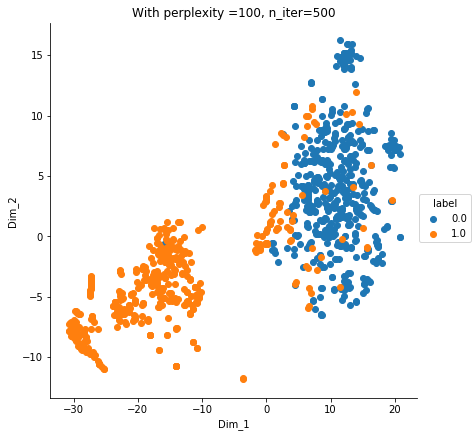

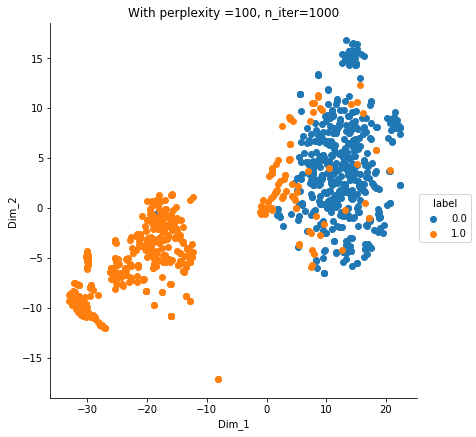

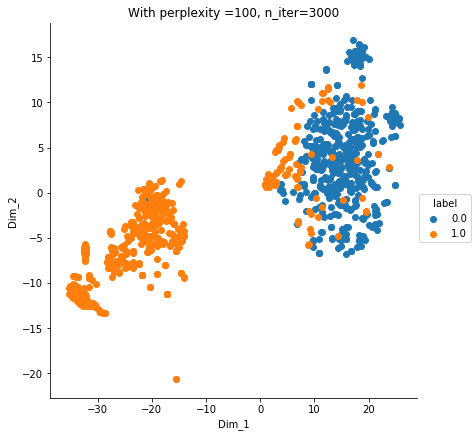

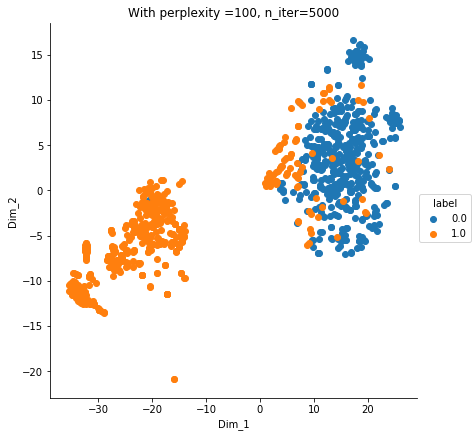

In [96]:
for i in neighbourhood:
    for j in iteration:
#         print (i,j)
        plot_tsne(j,i)

As we experiment with the value of perplexity and the number of iterations , we can see that three clusters are formed(two for fraud and one for legitimate), if the point belongs to one of the fraud cluster we can definitely
say that it was a fraud transaction.However we can not say that a transaction is legitimate if it falls int the
blue cluster , as there are many orange points in the blue cluster.<br/>
As we increase the number of perplexity and no. of iterations , the two fraud clusters come very close and can,
be seen as one.